# Data Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents, Loan_ID, Gender, Married, Education, Self_Employed, ApplicantIncome, Co-applicantIncome, Loan_Amount, Loan_Amount_Term, Credit History, Property_Area, 

Dependent Variable (Target Variable):

- Loan_Status

Need to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Import Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [92]:
#importing dataset from github

df=pd.read_csv('https://github.com/dsrscientist/DSData/raw/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Totally, We have a 13 columns in the dataset and Loan Status column is the target column.

In [93]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

The above code will help me to view all the columns and rows whenever is required.

# Checking Data type and Shape

In [94]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [95]:
df.shape

(614, 13)

In [25]:
df=df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From the above info - we can clearly see there is null value in 7 columns this decision come from the above info because each column should contain 614 rows if not then it have null value

# Checking Unique Value only in doubtfull column

In [96]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [97]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [99]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [100]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [101]:
df["Gender"]=df["Gender"].fillna("Male")
df["Married"]=df["Married"].fillna("Yes")
df["Dependents"]=df["Dependents"].fillna("0")
df["Self_Employed"]=df["Self_Employed"].fillna("No")
df["LoanAmount"]=df["LoanAmount"].fillna(np.mean(df["LoanAmount"]))
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(np.mean(df["Loan_Amount_Term"]))
df["Credit_History"]=df["Credit_History"].fillna(np.mean(df["Credit_History"]))

I have run the above code on the seven columns based on my decision.

First four columns are category type hence i decided to fill the null value with mode based.
Last three columns are number type hence i decided to fill the null value with mean based.

In [102]:
df["CoapplicantIncome"]=df["CoapplicantIncome"].astype(int)
df["LoanAmount"]=df["LoanAmount"].astype(int)
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].astype(int)
df["Credit_History"]=df["Credit_History"].astype(int)

I have changed the data type from float to integer becasue it contain the 0 decimal value Hence, I have changed to integer.

In [103]:
df=df.drop(['Loan_ID'],axis=1)
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have successfully removed that Loan_ID columns from the dataset because here no use to contain the ID details for upcoming step.

In [104]:
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int32
LoanAmount            int32
Loan_Amount_Term      int32
Credit_History        int32
Property_Area        object
Loan_Status          object
dtype: object

In [105]:
df.shape

(614, 12)

We have a 614 rows and 12 column in the dataset now.

# Checking Null Value

In [106]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We don't have a null value in the dataset. However, I will ensure with heatmap in next step.

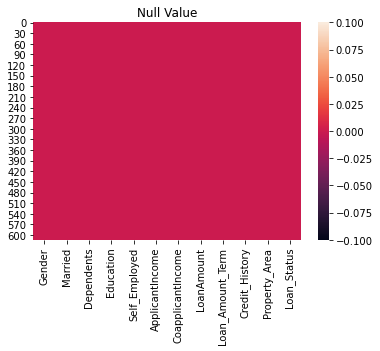

In [107]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

# Visualization of Data:

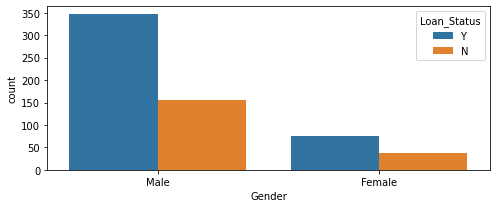

In [108]:
fig = plt.figure(figsize=(7,3))
sns.countplot('Gender', hue='Loan_Status', data=df)
plt.tight_layout()
plt.show()

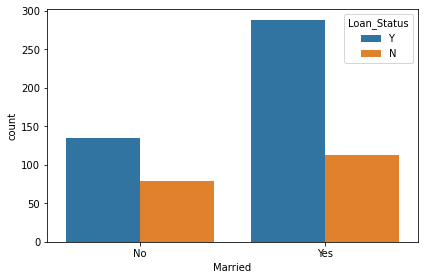

In [109]:
sns.countplot('Married', hue='Loan_Status', data=df)
plt.tight_layout()
plt.show()

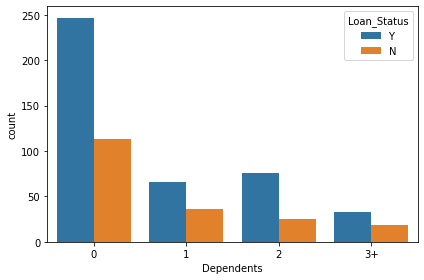

In [110]:
sns.countplot('Dependents', hue='Loan_Status', data=df)
plt.tight_layout()
plt.show()

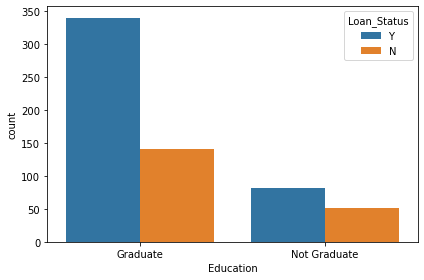

In [111]:
sns.countplot('Education', hue='Loan_Status', data=df)
plt.tight_layout()
plt.show()

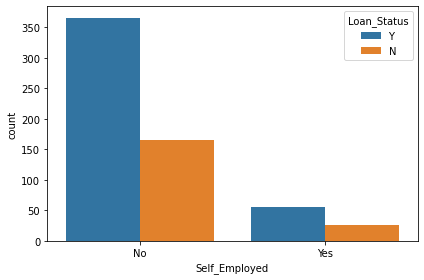

In [112]:
sns.countplot('Self_Employed', hue='Loan_Status', data=df)
plt.tight_layout()
plt.show()

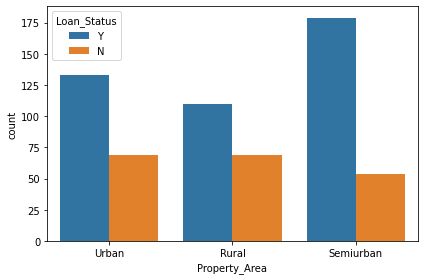

In [113]:
sns.countplot('Property_Area', hue='Loan_Status', data=df)
plt.tight_layout()
plt.show()

# Encoding the Dataframe:

In [114]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1)).astype(int)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,146,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1


We are not changing all the columns for Ordinal encoder becasue we have only eight columns as Ordinal encoder hence we did only for that five columns.

# Describe Dataset

In [115]:
#Statistical Summary
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.00000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.24430,146.397394,342.000000,0.773616,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.24876,84.037503,64.372489,0.418832,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.00000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.00000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.50000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.25000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.00000,700.000000,480.000000,1.000000,2.000000,1.000000


We have a outlier and skewness. So we will check in further step

# Correlation Checking:

In [116]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107909,-0.073567,0.026655,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075947,0.147131,-0.100863,-0.018150,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030429,0.163108,-0.101054,-0.017523,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.167041,-0.077242,-0.081637,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115259,-0.033943,-0.004994,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116604,0.565621,-0.045242,0.006986,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075947,0.030429,-0.062290,-0.016100,-0.116604,1.000000,0.187863,-0.059674,-0.058796,0.010521,-0.059188
LoanAmount,0.107909,0.147131,0.163108,-0.167041,0.115259,0.565621,0.187863,1.000000,0.038812,-0.034518,-0.044818,-0.036345
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059674,0.038812,1.000000,0.005446,-0.077620,-0.020974
Credit_History,0.026655,-0.018150,-0.017523,-0.081637,-0.004994,0.006986,-0.058796,-0.034518,0.005446,1.000000,-0.018761,0.432616


Correlation using heatmap

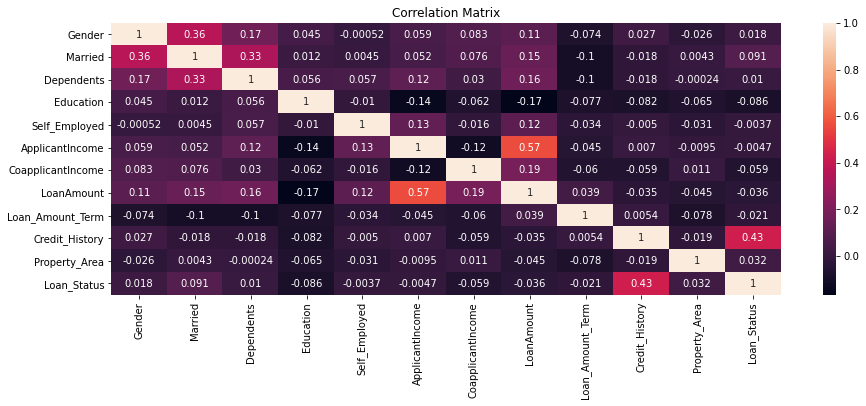

In [118]:
corr_mat=df.corr()

plt.figure(figsize=[15,5])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outcome of Correlation

We can see the positive and negative correlation with the target column. However,Credit history playing a major role in Loan_Status with 43% of correlation with target variable.

# Outlier Checking 

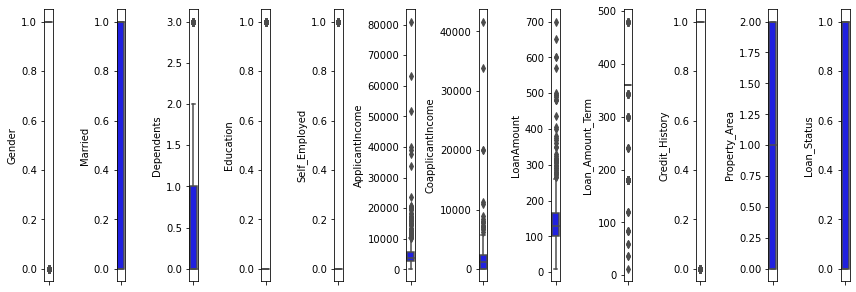

In [119]:
collist=df.columns.values
ncol=12
nrow=6
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In the above - we have a outlier in nine columns which are 'Gender','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'. So, we will rectify in further step

# Checking Skewness

In [120]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491530
LoanAmount           2.727127
Loan_Amount_Term    -2.389680
Credit_History      -1.310835
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

From the above info - we can see the skewness in the dataset. But we need to skip the columns which we have encoded as int. Because those are categorical based We won't consider that columns having skewness.

Also, We can consider the -/+.5 is standard

# Data Cleaning

# Removing Outlier

In [121]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [122]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(614, 12)
(577, 12)


In [123]:
Loss_percentage=(614-577)/614*100
print(Loss_percentage)

6.026058631921824


Actually, We are having a 6%(rounded Off) dataloss in the dataset which are good to go for further step.

In [124]:
X=df_new.iloc[:,:-1]
Y=df_new.iloc[:,-1]

We are spliting the dataset which are X is feature and Y is target.

# Data Transform for Remove Skewness

In [125]:
from sklearn.preprocessing import power_transform
DF=power_transform(X,method='yeo-johnson')
DF

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.14260892,
         0.54196123,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.54196123, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.14260892,
         0.54196123,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.54196123,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.14260892,
         0.54196123,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.14260892,
        -1.84515044,  0.01546372]])

In [126]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(DF)
x

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.14260892,
         0.54196123,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.54196123, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.14260892,
         0.54196123,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.54196123,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.14260892,
         0.54196123,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.14260892,
        -1.84515044,  0.01546372]])

# Finding the Model and Random State:

I have choosed the logistic Regression because outcome has a two variable. Hence, I am going with classification Model.

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range (0,100):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,Y_train)
    predrf=LR.predict(x_test)
    acc = accuracy_score(Y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 84.48275862068965 on Random state 55


I have created the test size for 30% to find the best random state and Accuracy score. Finally, We got 84% accuracy score and Random state is 55.

# Creating Train-Test Split

In [129]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=55)

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train,Y_train)
pred=LR.predict(x_test)
print (accuracy_score(Y_test, pred))
print (confusion_matrix(Y_test, pred))
print (classification_report(Y_test, pred))

0.8448275862068966
[[ 29  21]
 [  6 118]]
              precision    recall  f1-score   support

           0       0.83      0.58      0.68        50
           1       0.85      0.95      0.90       124

    accuracy                           0.84       174
   macro avg       0.84      0.77      0.79       174
weighted avg       0.84      0.84      0.84       174



In [132]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,Y_train)
prid=DT.predict(x_test)
print (accuracy_score(Y_test, prid))
print (confusion_matrix(Y_test, prid))
print (classification_report(Y_test, prid))

0.6839080459770115
[[24 26]
 [29 95]]
              precision    recall  f1-score   support

           0       0.45      0.48      0.47        50
           1       0.79      0.77      0.78       124

    accuracy                           0.68       174
   macro avg       0.62      0.62      0.62       174
weighted avg       0.69      0.68      0.69       174



In [133]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,Y_train)
predi=RF.predict(x_test)
print (accuracy_score(Y_test, predi))
print (confusion_matrix(Y_test, predi))
print (classification_report(Y_test, predi))

0.7701149425287356
[[ 26  24]
 [ 16 108]]
              precision    recall  f1-score   support

           0       0.62      0.52      0.57        50
           1       0.82      0.87      0.84       124

    accuracy                           0.77       174
   macro avg       0.72      0.70      0.70       174
weighted avg       0.76      0.77      0.76       174



In [134]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,Y_train)
prd=svc.predict(x_test)
print (accuracy_score(Y_test, prd))
print (confusion_matrix(Y_test, prd))
print (classification_report(Y_test, prd))

0.8275862068965517
[[ 29  21]
 [  9 115]]
              precision    recall  f1-score   support

           0       0.76      0.58      0.66        50
           1       0.85      0.93      0.88       124

    accuracy                           0.83       174
   macro avg       0.80      0.75      0.77       174
weighted avg       0.82      0.83      0.82       174



Random Forest score is - 77%
Decision Tree score is - 68%
Logistic Regression Score is - 84%
SVC score is - 83%
We are getting the high accuracy with Logistic Regression model is 84%. It will be cross check with CV.

# Finding the best CV value:

In [138]:
from sklearn.model_selection import cross_val_score
for j in range (2,6):
    cv_score=cross_val_score(LR,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At score fold {j} is having the CV_Score is {cv_mean*100}")

At score fold 2 is having the CV_Score is 78.1640474817378
At score fold 3 is having the CV_Score is 77.2929260218768
At score fold 4 is having the CV_Score is 76.772030651341
At score fold 5 is having the CV_Score is 77.98950524737631


Based on the above high score of Loistic Regression. I have runned with LR to find best cv value. Here, I choosed cv=5 is best. Hence. will check the cross validation other model.

In [142]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(LR,x,Y,cv=5)
scr=cross_val_score(DT,x,Y,cv=5)
sc=cross_val_score(RF,x,Y,cv=5)
scor=cross_val_score(svc,x,Y,cv=5)
print("Cross Validation Score of LR :",score.mean()*100)
print("Cross Validation Score of DT :",scr.mean()*100)
print("Cross Validation Score of RF :",sc.mean()*100)
print("Cross Validation Score of svc :",scor.mean()*100)

Cross Validation Score of LR : 77.98950524737631
Cross Validation Score of DT : 66.02998500749625
Cross Validation Score of RF : 74.34782608695653
Cross Validation Score of svc : 77.29535232383807


Minimum Difference in accuracy and cross_validation score is for Decision Tree is (2%). So, this is best model

# AUC ROC Curve:

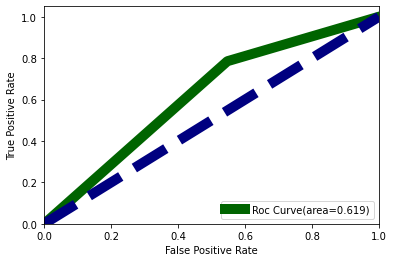

In [143]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(prid,Y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkgreen",lw=10,label='Roc Curve(area=%0.3f)'%roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Hyper Parameter Tuning

In [144]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': np.arange(2,15),
             'criterion':['gini','entropy']}
GCV=GridSearchCV(DT,parameters,cv=5)
GCV.fit(x_train,Y_train)
print(GCV.best_params_)

{'criterion': 'entropy', 'max_depth': 2}


In [145]:
DT=DecisionTreeClassifier(criterion="entropy",max_depth=2)
DT.fit(x_train,Y_train)
DT.score(x_train,Y_train)
predict=DT.predict(x_test)
AC=accuracy_score(Y_test,predict)
print("DecisionTree Score :",AC*100)

cv_score=cross_val_score(DT,x,Y,cv=5)
cv_mean=cv_score.mean()
print("CV Score :",cv_mean*100)

DecisionTree Score : 83.9080459770115
CV Score : 77.99100449775112


# Model Saving

In [146]:
import pickle
filename='Loan_Application_Prediction.pkl'
pickle.dump(RF,open(filename,'wb'))

# Conclusion

In [147]:
Loaded_load = pickle.load(open('Loan_Application_Prediction.pkl','rb'))
Result=Loaded_load.score(x_test,Y_test)
print(Result)

0.7701149425287356


In [148]:
Conclusion=pd.DataFrame([Loaded_load.predict(x_test)[:],predict[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173
Predicted,1,1,0,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1
Original,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,1,1,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1


We have a the outcome for this model with 77%(rounded Off) score.